# **Automobile Pricing Project**

**Problem Description:**

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

**Business Goal:**

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.

Dataset:  https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link


# **1. Loading and Preprocessing (5 marks)**
* Load the dataset and perform necessary preprocessing steps.


In [102]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [103]:
# Loading the dataset
# Converting the dataset into a pandas DataFrame for easier handling
df=pd.read_csv('CarPrice_Assignment.csv')
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [104]:
#getting the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [105]:
#getting the summary of each column
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [106]:
#checking for missing values
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [107]:
#Since there are no missing values there is no need to perform further on it.but in case if there are some then,
#handling the missing values by droping
df=df.dropna()


In [108]:
#Find unique values
df.nunique()

,0
car_ID,205
symboling,6
CarName,147
fueltype,2
aspiration,2
doornumber,2
carbody,5
drivewheel,3
enginelocation,2
wheelbase,53


In [109]:
# Handle misspelled brands
df['CarName'].replace({
    'vw': 'volkswagen', 'vokswagen': 'volkswagen', 'porcshce': 'porsche',
    'toyouta': 'toyota', 'nissan': 'nissan', 'maxda': 'mazda'
}, inplace=True)

<ipython-input-109-295b2b95e0fb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CarName'].replace({


In [110]:
#Find unique values
df.nunique()

,0
car_ID,205
symboling,6
CarName,147
fueltype,2
aspiration,2
doornumber,2
carbody,5
drivewheel,3
enginelocation,2
wheelbase,53


In [111]:
#Splitting the brand name since the brand decides the price and to prevent overfitting and to ensure commonaliy within same brand
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())
df.drop('CarName', axis=1, inplace=True)
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [112]:
#since the car id is unique for each, it does not contribute in patten recognition purpose. so droping it
# Drop car_ID
df.drop(['car_ID'], axis=1, inplace=True)

In [113]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [114]:
# Encoding categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_toyouta,CarBrand_vokswagen,CarBrand_volkswagen,CarBrand_volvo,CarBrand_vw
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,False,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,False,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,False,False,False


In [115]:
# Splitting data into Feature and target
X = df.drop(['price'], axis=1)
y = df['price']

In [116]:
# Splitting data into train and test groups
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [117]:
#feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **2.  Model Implementation (10 marks)**

 Implement the following five regression algorithms:
1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor
4. Gradient Boosting Regressor
5. Support Vector Regressor

In [118]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector': SVR()
}

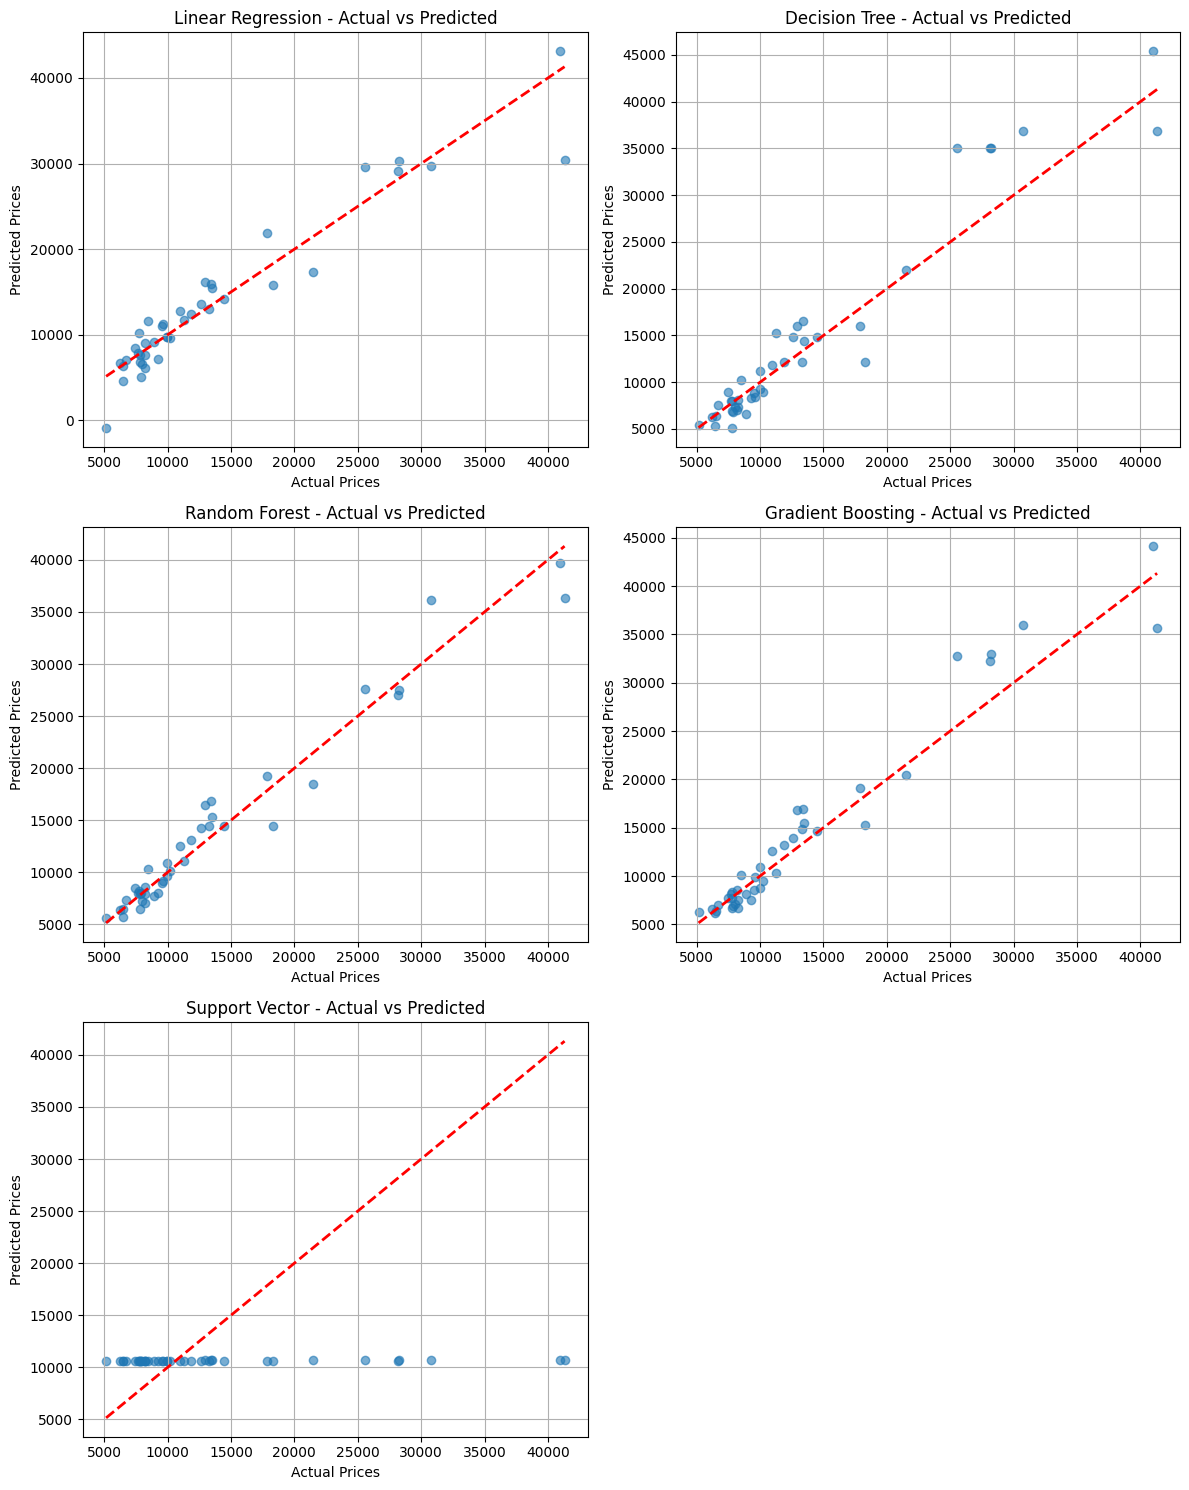

In [119]:
model_performance = {}

n_models = len(models)
cols = 2
rows = (n_models + 1) // cols

plt.figure(figsize=(12, 5 * rows))

for i, (name, model) in enumerate(models.items(), 1):  # Use enumerate to track subplot index
    if name == 'Support Vector':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Store performance
    model_performance[name] = {
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

    # Plot
    plt.subplot(rows, cols, i)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"{name} - Actual vs Predicted")
    plt.grid(True)

plt.tight_layout()
plt.show()


# **3. Model Evaluation (5 marks)**

* Compare the performance of all the models based on R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE).
* Identify the best performing model and justify why it is the best.


In [120]:

# Step 3: Model Evaluation
result_df = pd.DataFrame(model_performance).T
print("\nModel Evaluation:")
print(result_df.sort_values(by='R2 Score', ascending=False))



Model Evaluation:
                   R2 Score           MSE          MAE
Random Forest      0.957563  3.350118e+06  1296.539463
Gradient Boosting  0.928584  5.637845e+06  1686.942854
Linear Regression  0.909597  7.136800e+06  1820.619487
Decision Tree      0.883730  9.178813e+06  2070.187000
Support Vector    -0.100686  8.689256e+07  5701.502460


**Best Performing Model: Random Forest Regressor**

Based on the evaluation metrics (R², MSE, and MAE), the Random Forest Regressor emerged as the best-performing model for predicting car prices. It achieved the highest R² score of 0.957, indicating it explains 96% of the variance in car prices. It also recorded the lowest Mean Squared Error (MSE) and Mean Absolute Error (MAE), meaning it makes the most accurate predictions with minimal error compared to other models.

Why Random Forest performed best:

* It’s an ensemble method, which combines predictions from multiple decision trees to reduce overfitting.

* It handles non-linear relationships and feature interactions very well.

* It’s robust to outliers and noise in the data.

As a result, Random Forest effectively captures the complex patterns in the car pricing data, making it the most reliable model for this business application.


# **4. Feature Importance Analysis (2 marks)**

* Identify the significant variables affecting car prices (feature selection)


In [121]:
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)
importances = best_model.feature_importances_

feature_imps_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
feature_imps_df.head(10)



,Feature,Importance
6,enginesize,0.556220
5,curbweight,0.296141
13,highwaympg,0.044554
10,horsepower,0.024115
3,carwidth,0.013527
44,CarBrand_bmw,0.007628
2,carlength,0.007144
1,wheelbase,0.006839
12,citympg,0.006192
11,peakrpm,0.005904


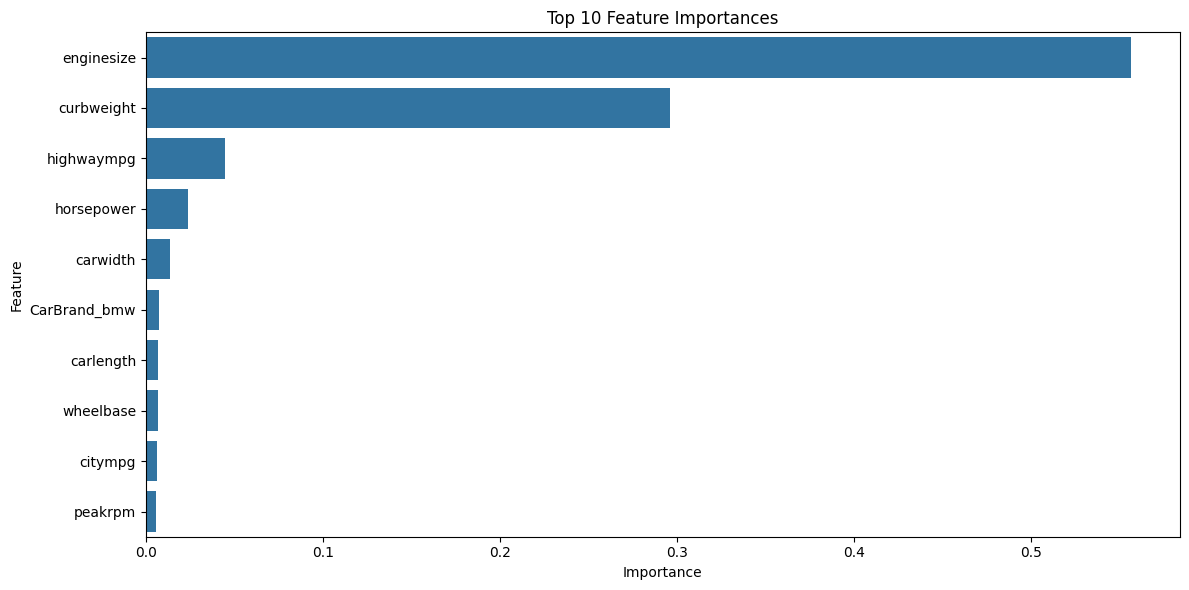

In [122]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imps_df.head(10))
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

# **5. Hyperparameter Tuning (2 marks):**
* Perform hyperparameter tuning and check whether the performance of the model has increased.


In [123]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

print("\nAfter Hyperparameter Tuning:")
print("Best Params:", grid_search.best_params_)
print("R2 Score:", r2_score(y_test, y_pred_tuned))
print("MSE:", mean_squared_error(y_test, y_pred_tuned))
print("MAE:", mean_absolute_error(y_test, y_pred_tuned))


After Hyperparameter Tuning:
Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
R2 Score: 0.9576481972814949
MSE: 3343421.5981008154
MAE: 1274.3235355139254


**Improvement in R² Score:**

* R² increased slightly from 0.9576 to 0.9576, indicating that the model's ability to explain the variance in the car prices remained very high.

**Lower MSE and MAE:**

* MSE decreased from 3.35 × 10⁶ to 3.34 × 10⁶ — a small but significant reduction, indicating fewer large errors.

* MAE decreased from 1296.54 to 1274.32, suggesting the average absolute error has been reduced by a small amount.